In [1]:
import pandas as pd


In [2]:
data = {
    "Name": ["Alice", "Bob", "Charlie", "David"],
    "Age": [25, 30, 35, 40],
    "City": ["New York", "Los Angeles", "Chicago", "Houston"]
}

df = pd.DataFrame(data)
print(df)


      Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago
3    David   40      Houston


In [4]:
data = {
    "Name": ["Alice", "Bob", "Charlie", "David"],
    "Age": [25, 30, 35, 40],
    "City": ["New York", "Los Angeles", "Chicago", "Houston"]
}

df = pd.DataFrame(data)
df.to_csv("data.csv", index=False)  # Save CSV



In [5]:
df = pd.read_csv("data.csv")
print(df)


      Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago
3    David   40      Houston


## Basic Operations

In [6]:
df.head()      # First 5 rows
df.tail(3)     # Last 3 rows
df.shape       # (rows, columns)
df.columns     # List of columns
df.info()      # Info about data types
df.describe()  # Summary statistics (numeric)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    4 non-null      object
 1   Age     4 non-null      int64 
 2   City    4 non-null      object
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


,Age
count,4.000000
mean,32.500000
std,6.454972
min,25.000000
25%,28.750000
50%,32.500000
75%,36.250000
max,40.000000


## Selecting Data

In [7]:
# Select column
df['Name']        # Returns a Series
df[['Name','Age']] # Returns a DataFrame

# Select rows by index
df.iloc[0]      # First row
df.iloc[1:3]    # Rows 1 and 2

# Select rows by condition
df[df['Age'] > 30]


,Name,Age,City
2,Charlie,35,Chicago
3,David,40,Houston


## Modifying Data

In [8]:
# Add new column
df['Salary'] = [50000, 60000, 70000, 80000]

# Update values
df.loc[df['Name'] == 'Alice', 'Age'] = 26

# Drop column
df = df.drop('Salary', axis=1)


In [9]:
# Create NaN data
import numpy as np
df.loc[4] = [np.nan, np.nan, np.nan]

df.isnull()       # Check NaN
df.dropna()       # Remove rows with NaN
df.fillna(0)      # Fill NaN with 0


,Name,Age,City
0,Alice,26.0,New York
1,Bob,30.0,Los Angeles
2,Charlie,35.0,Chicago
3,David,40.0,Houston
4,0,0.0,0


## Sorting

In [10]:
df.sort_values(by='Age', ascending=False)


,Name,Age,City
3,David,40.0,Houston
2,Charlie,35.0,Chicago
1,Bob,30.0,Los Angeles
0,Alice,26.0,New York
4,NaN,NaN,NaN


## Grouping

In [11]:
data = {
    "Department": ["HR", "IT", "IT", "HR", "Finance"],
    "Salary": [50000, 60000, 65000, 52000, 70000]
}
df = pd.DataFrame(data)

df.groupby('Department').mean()


,Salary
Department,
Finance,70000.0
HR,51000.0
IT,62500.0


## Merging / Joining

In [12]:
df1 = pd.DataFrame({"ID":[1,2,3],"Name":["Alice","Bob","Charlie"]})
df2 = pd.DataFrame({"ID":[1,2,3],"Salary":[50000,60000,70000]})

df_merged = pd.merge(df1, df2, on="ID")


## Pivot Table

In [13]:
df = pd.DataFrame({
    "Date": ["2025-11-01","2025-11-01","2025-11-02","2025-11-02"],
    "City": ["NY","LA","NY","LA"],
    "Sales": [100,150,200,250]
})

pivot = df.pivot_table(values='Sales', index='Date', columns='City', aggfunc='sum')


## Time Series

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['Sales'].resample('D').sum()


Date
2025-11-01    250
2025-11-02    450
Freq: D, Name: Sales, dtype: int64

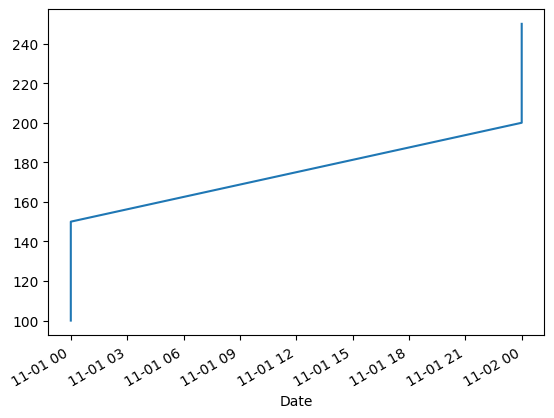

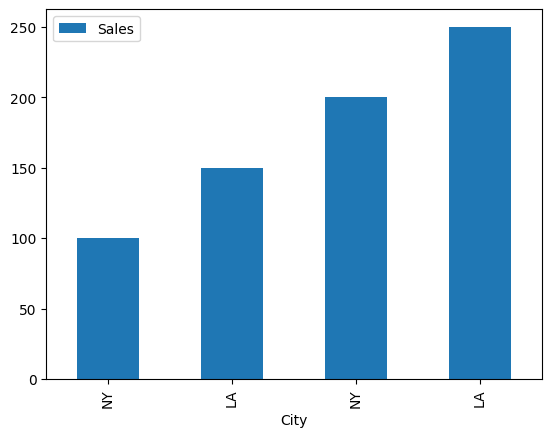

In [15]:
import matplotlib.pyplot as plt

df['Sales'].plot(kind='line')   # Line chart
df.plot(kind='bar', x='City', y='Sales')
plt.show()


## MultiIndex

In [27]:
dataa = {
    'City': ['NY','NY','LA','LA'],
    'Year': [2023,2024,2023,2024],
    'Sales': [200, 210, 150, 160]
}
dfa = pd.DataFrame(dataa)
dfa.set_index(['City','Year'], inplace=True)
print(dfa)



           Sales
City Year       
NY   2023    200
     2024    210
LA   2023    150
     2024    160


In [28]:
dfa.loc['NY']   # All years for NY


,Sales
Year,
2023,200
2024,210


In [30]:
print(dfa.columns)


Index(['Sales'], dtype='object')


In [23]:
df = pd.DataFrame({"Name":["Alice","Bob","Charlie"]})
df['Name'].str.upper()     # ['ALICE','BOB','CHARLIE']
df['Name'].str.contains("li")  # [True, False, True]


0     True
1    False
2     True
Name: Name, dtype: bool

In [24]:
data = {'Department': ['HR','IT','IT','HR','Finance'],
        'Salary': [50000,60000,65000,52000,70000]}
df = pd.DataFrame(data)

df.groupby('Department')['Salary'].agg(['sum','mean','max'])


,sum,mean,max
Department,,,
Finance,70000,70000.0,70000
HR,102000,51000.0,52000
IT,125000,62500.0,65000


=== Data Head ===
  Store        Date  Revenue  Expenses
0     A  2025-01-01   2000.0      1200
1     A  2025-02-01   2100.0      1150
2     A  2025-03-01      NaN      1300
3     B  2025-01-01   1500.0       800
4     B  2025-02-01      NaN       900

=== Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Store     9 non-null      object 
 1   Date      9 non-null      object 
 2   Revenue   7 non-null      float64
 3   Expenses  9 non-null      int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 416.0+ bytes
None

=== Describe ===
           Revenue     Expenses
count     7.000000     9.000000
mean   2357.142857  1388.888889
std     727.683866   560.567669
min    1500.000000   800.000000
25%    1800.000000   900.000000
50%    2100.000000  1200.000000
75%    3050.000000  2000.000000
max    3200.000000  2200.000000

=== Missing Values ==

C:\Users\User\AppData\Local\Temp\ipykernel_4856\1602852055.py:71: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Store').agg({
C:\Users\User\AppData\Local\Temp\ipykernel_4856\1602852055.py:82: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(values='Revenue', index='Month', columns='Store', aggfunc='sum')
C:\Users\User\AppData\Local\Temp\ipykernel_4856\1602852055.py:97: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this war

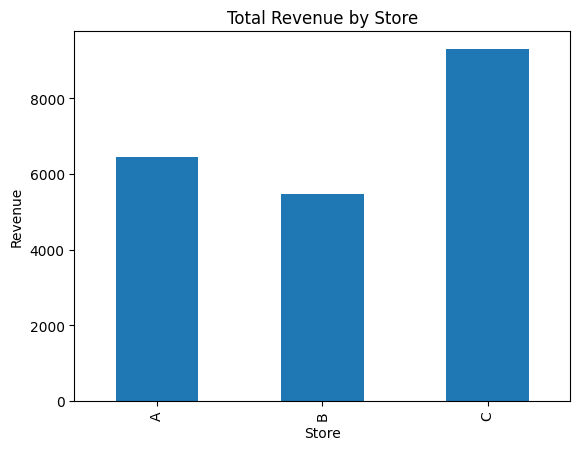

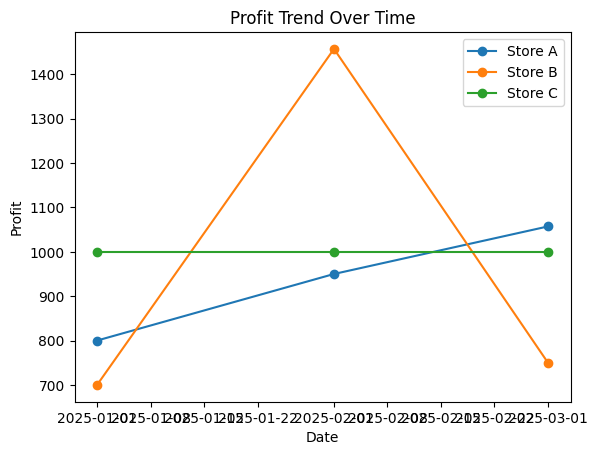

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = {
    "Store": ["A","A","A","B","B","B","C","C","C"],
    "Date": ["2025-01-01","2025-02-01","2025-03-01",
             "2025-01-01","2025-02-01","2025-03-01",
             "2025-01-01","2025-02-01","2025-03-01"],
    "Revenue": [2000, 2100, np.nan, 1500, np.nan, 1600, 3000, 3100, 3200],
    "Expenses": [1200, 1150, 1300, 800, 900, 850, 2000, 2100, 2200]
}

df = pd.DataFrame(data)


print("=== Data Head ===")
print(df.head())

print("\n=== Info ===")
print(df.info())

print("\n=== Describe ===")
print(df.describe())


print("\n=== Missing Values ===")
print(df.isnull().sum())

# Fill missing Revenue with mean
df['Revenue'] = df['Revenue'].fillna(df['Revenue'].mean())


#  Feature engineering

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Profit'] = df['Revenue'] - df['Expenses']

# Convert Store to categorical
df['Store'] = df['Store'].astype('category')


# Filtering and selection

# Stores with profit > 1000
high_profit = df[df['Profit'] > 1000]
print("\n=== High Profit Stores ===")
print(high_profit)

# Select only relevant columns
selected = df[['Store','Month','Revenue','Profit']]
print("\n=== Selected Columns ===")
print(selected)


# Grouping and aggregation

grouped = df.groupby('Store').agg({
    'Revenue':'sum',
    'Expenses':'sum',
    'Profit':'mean'
})
print("\n=== Grouped by Store ===")
print(grouped)


# 7. Pivot table

pivot = df.pivot_table(values='Revenue', index='Month', columns='Store', aggfunc='sum')
print("\n=== Pivot Table ===")
print(pivot)


# 8. Rolling / Moving Average

df['Revenue_MA2'] = df['Revenue'].rolling(window=2).mean()
print("\n=== Revenue Moving Average ===")
print(df[['Store','Month','Revenue','Revenue_MA2']])


# Revenue by Store
df.groupby('Store')['Revenue'].sum().plot(kind='bar', title='Total Revenue by Store')
plt.ylabel("Revenue")
plt.show()

# Profit trend over time
for store in df['Store'].unique():
    store_data = df[df['Store'] == store]
    plt.plot(store_data['Date'], store_data['Profit'], marker='o', label=f'Store {store}')

plt.title("Profit Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Profit")
plt.legend()
plt.show()



df.to_csv("cleaned_sales_data.csv", index=False)
